# Telecom Customer Churn

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Lets import the Dataset into a DataFrame

In [48]:
df = pd.read_csv('./telco_churn.csv', index_col= 'customerID')
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Descriptive Analysis

In [49]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


### Exploratory Analysis

In [52]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
continuous = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
target = ['Churn']

In [54]:
def plot_categorical_variables(data):
    n_cols = 3
    n_rows = int(len(categorical_cols) / n_cols) + (len(categorical_cols) % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=data, ax=axs[i], palette='Set2')
        axs[i].set_title(col)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis='x', rotation=45)
        
    # Hide empty subplots
    for j in range(i+1, n_rows*n_cols):
        axs[j].axis('off')
        
    plt.tight_layout()
    plt.show()

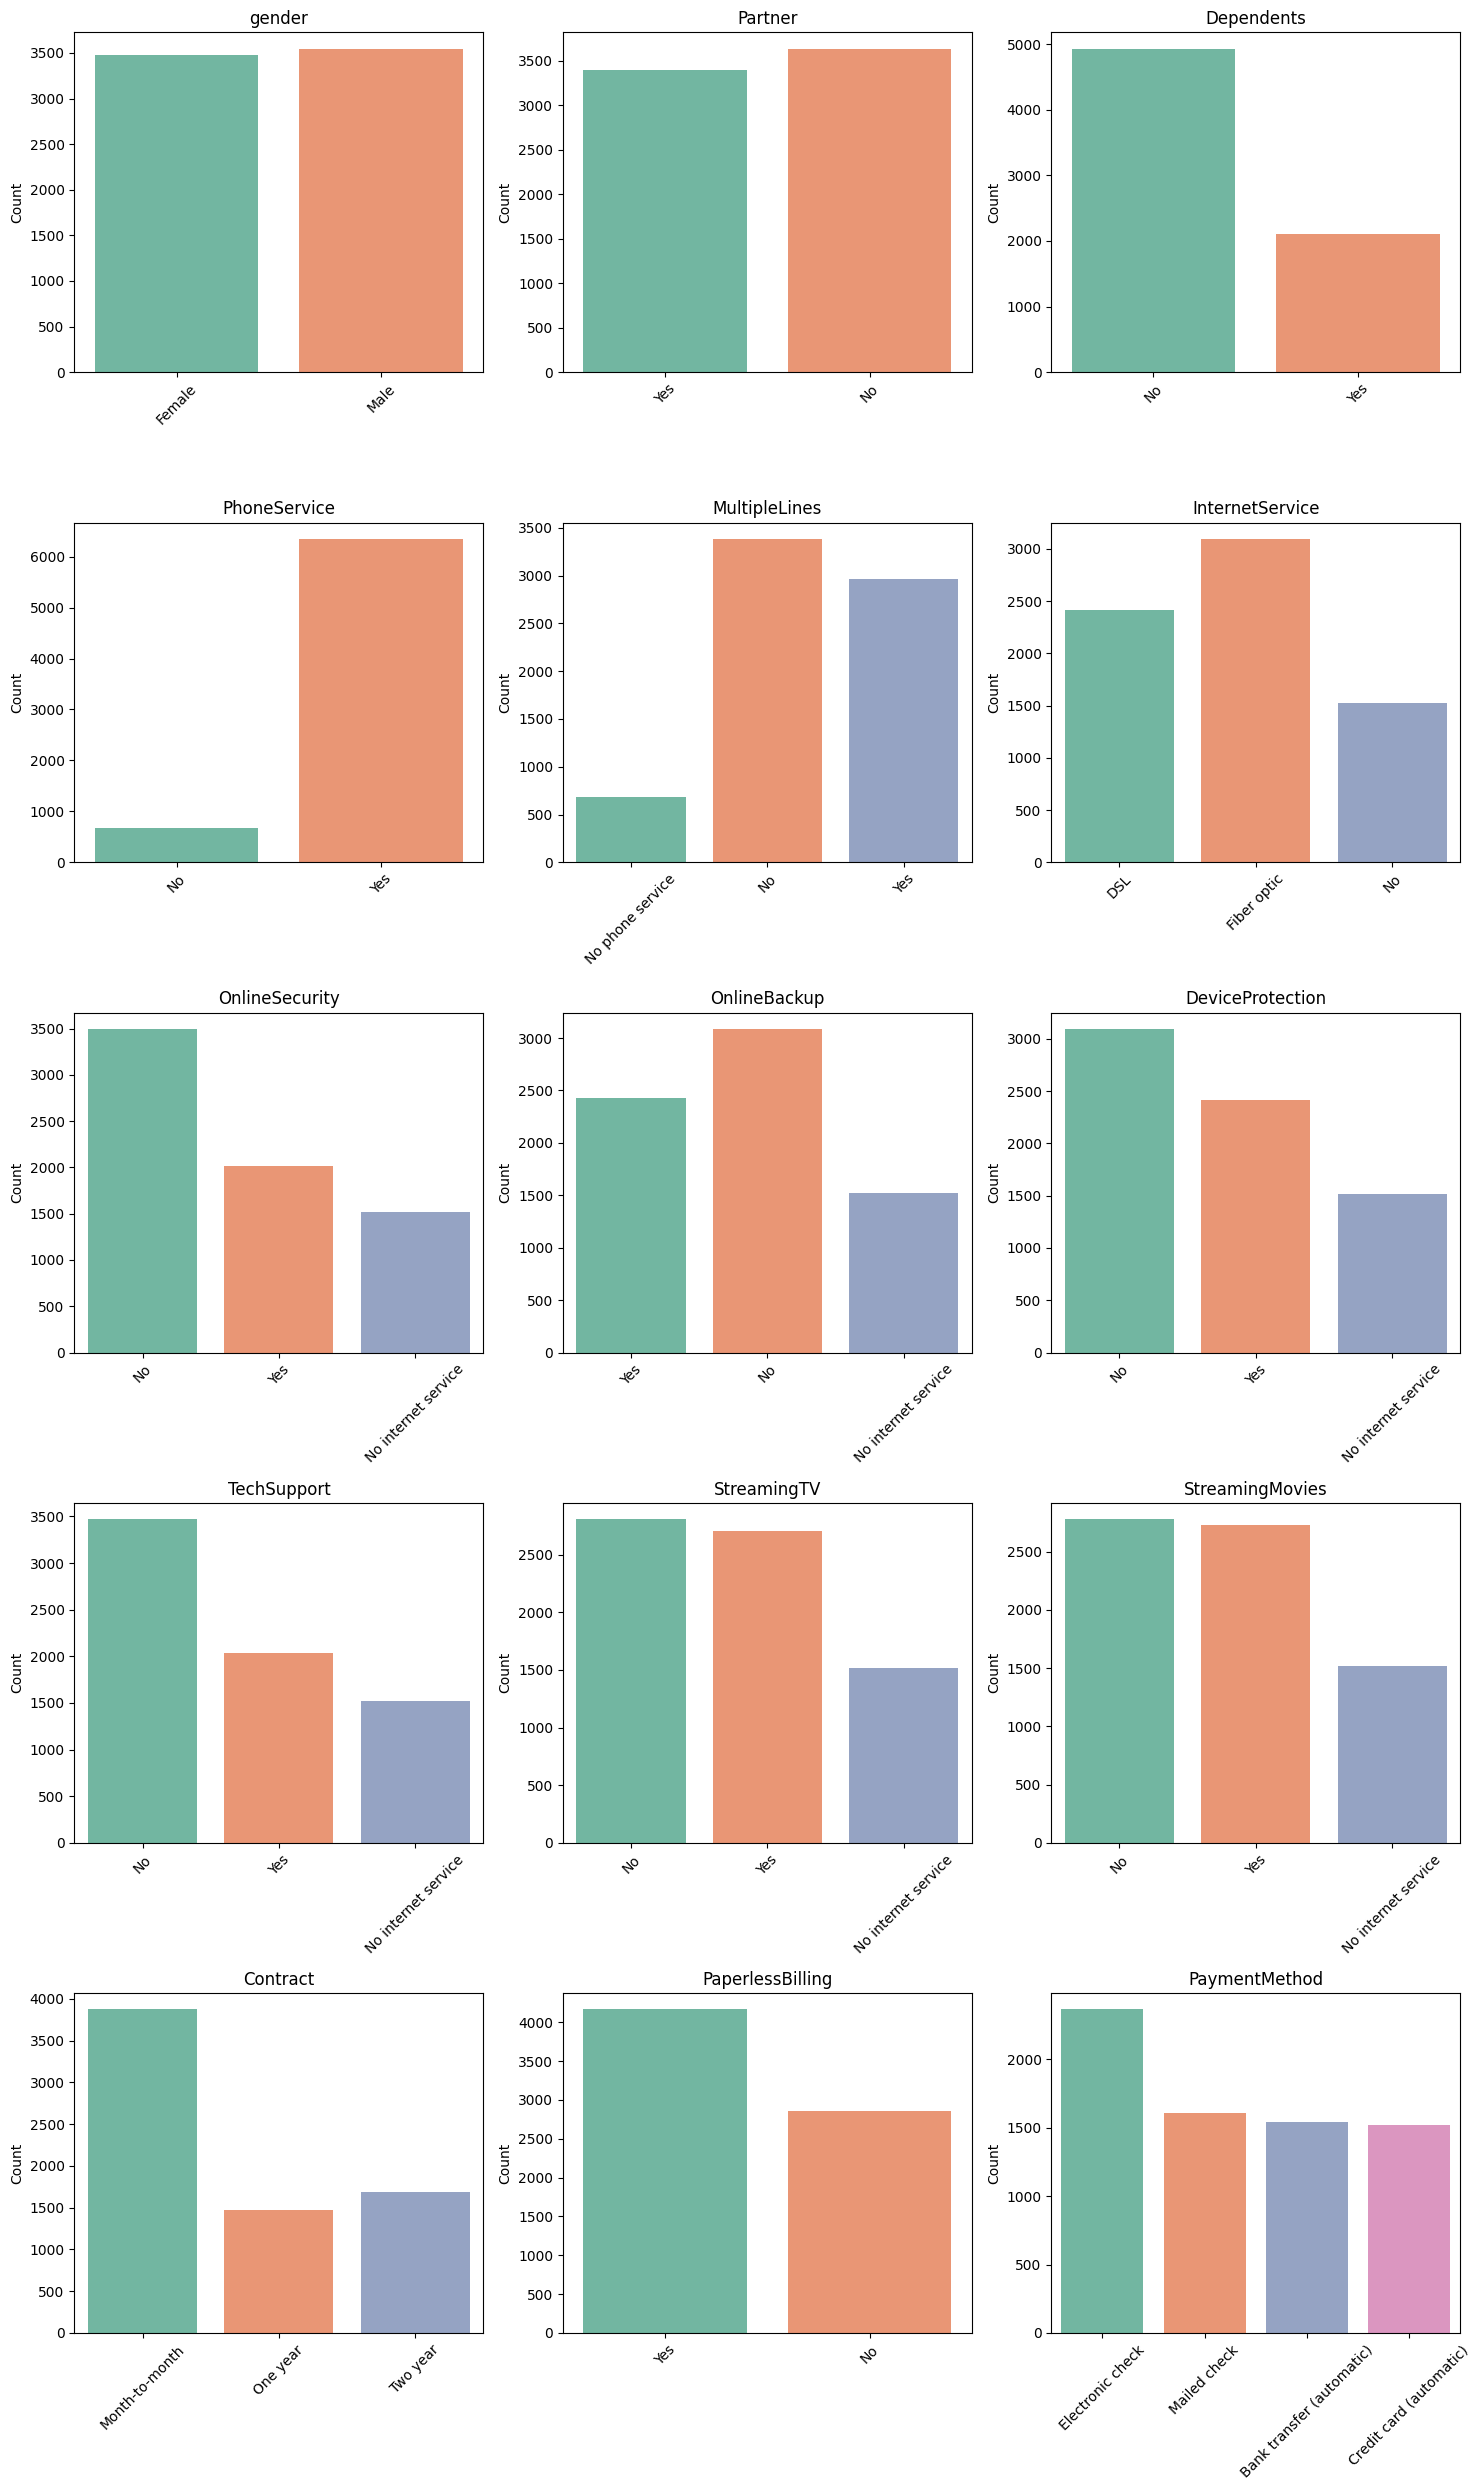

In [55]:
plot_categorical_variables(df)

[Text(0, 0, '5163'), Text(0, 0, '1869')]

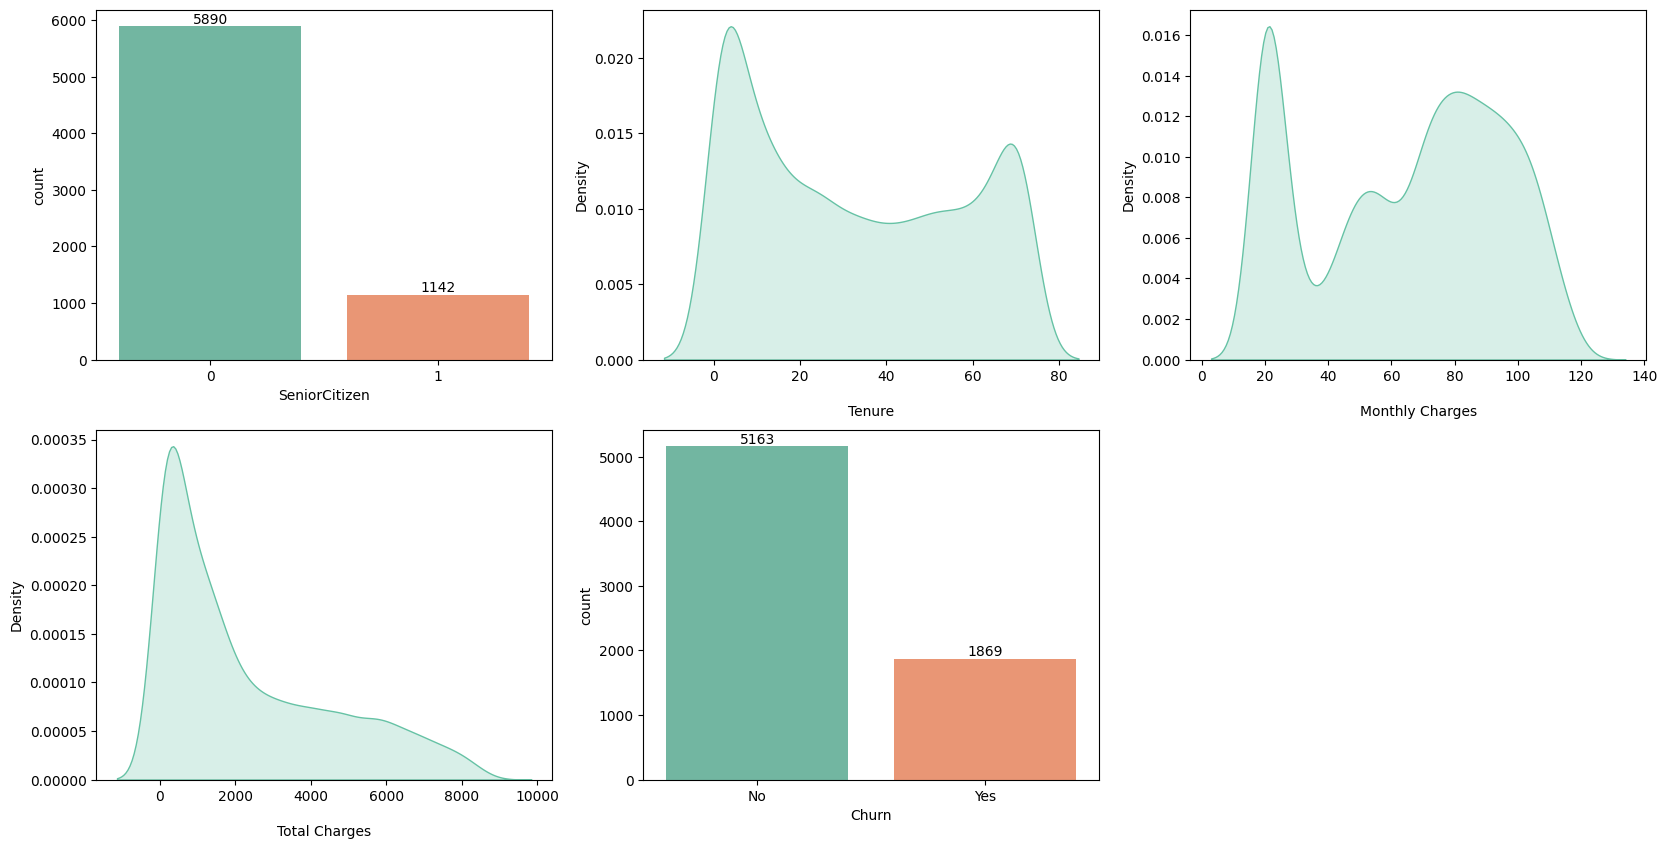

In [56]:
sns.set_palette('Set2')
fig = plt.figure(figsize=(20,10))
grid = fig.add_gridspec(2,3)

ax0 = fig.add_subplot(grid[0,0])
sns.countplot(x=df.SeniorCitizen, ax=ax0)
ax0.bar_label(ax0.containers[0])

ax1 = fig.add_subplot(grid[0,1])
sns.kdeplot(x=df.tenure, fill=True, ax=ax1)
ax1.set_xlabel('\nTenure')

ax2 = fig.add_subplot(grid[0,2])
sns.kdeplot(x=df.MonthlyCharges, fill=True, ax=ax2)
ax2.set_xlabel('\nMonthly Charges')

ax3 = fig.add_subplot(grid[1,0])
sns.kdeplot(x=df.TotalCharges, fill=True, ax=ax3)
ax3.set_xlabel('\nTotal Charges')

ax4 = fig.add_subplot(grid[1,1])
sns.countplot(x=df.Churn, ax=ax4)
ax4.bar_label(ax4.containers[0])

In [57]:
def plot_categorical_churn(data):
    n_cols = 3
    n_rows = int(len(categorical_cols) / n_cols) + (len(categorical_cols) % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(categorical_cols):
        sns.countplot(x= data.Churn ,hue=col, data=data, ax=axs[i], palette='Set2')
        axs[i].set_title(col)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis='x', rotation=45)
        
    # Hide empty subplots
    for j in range(i+1, n_rows*n_cols):
        axs[j].axis('off')
        
    plt.tight_layout()
    plt.show()

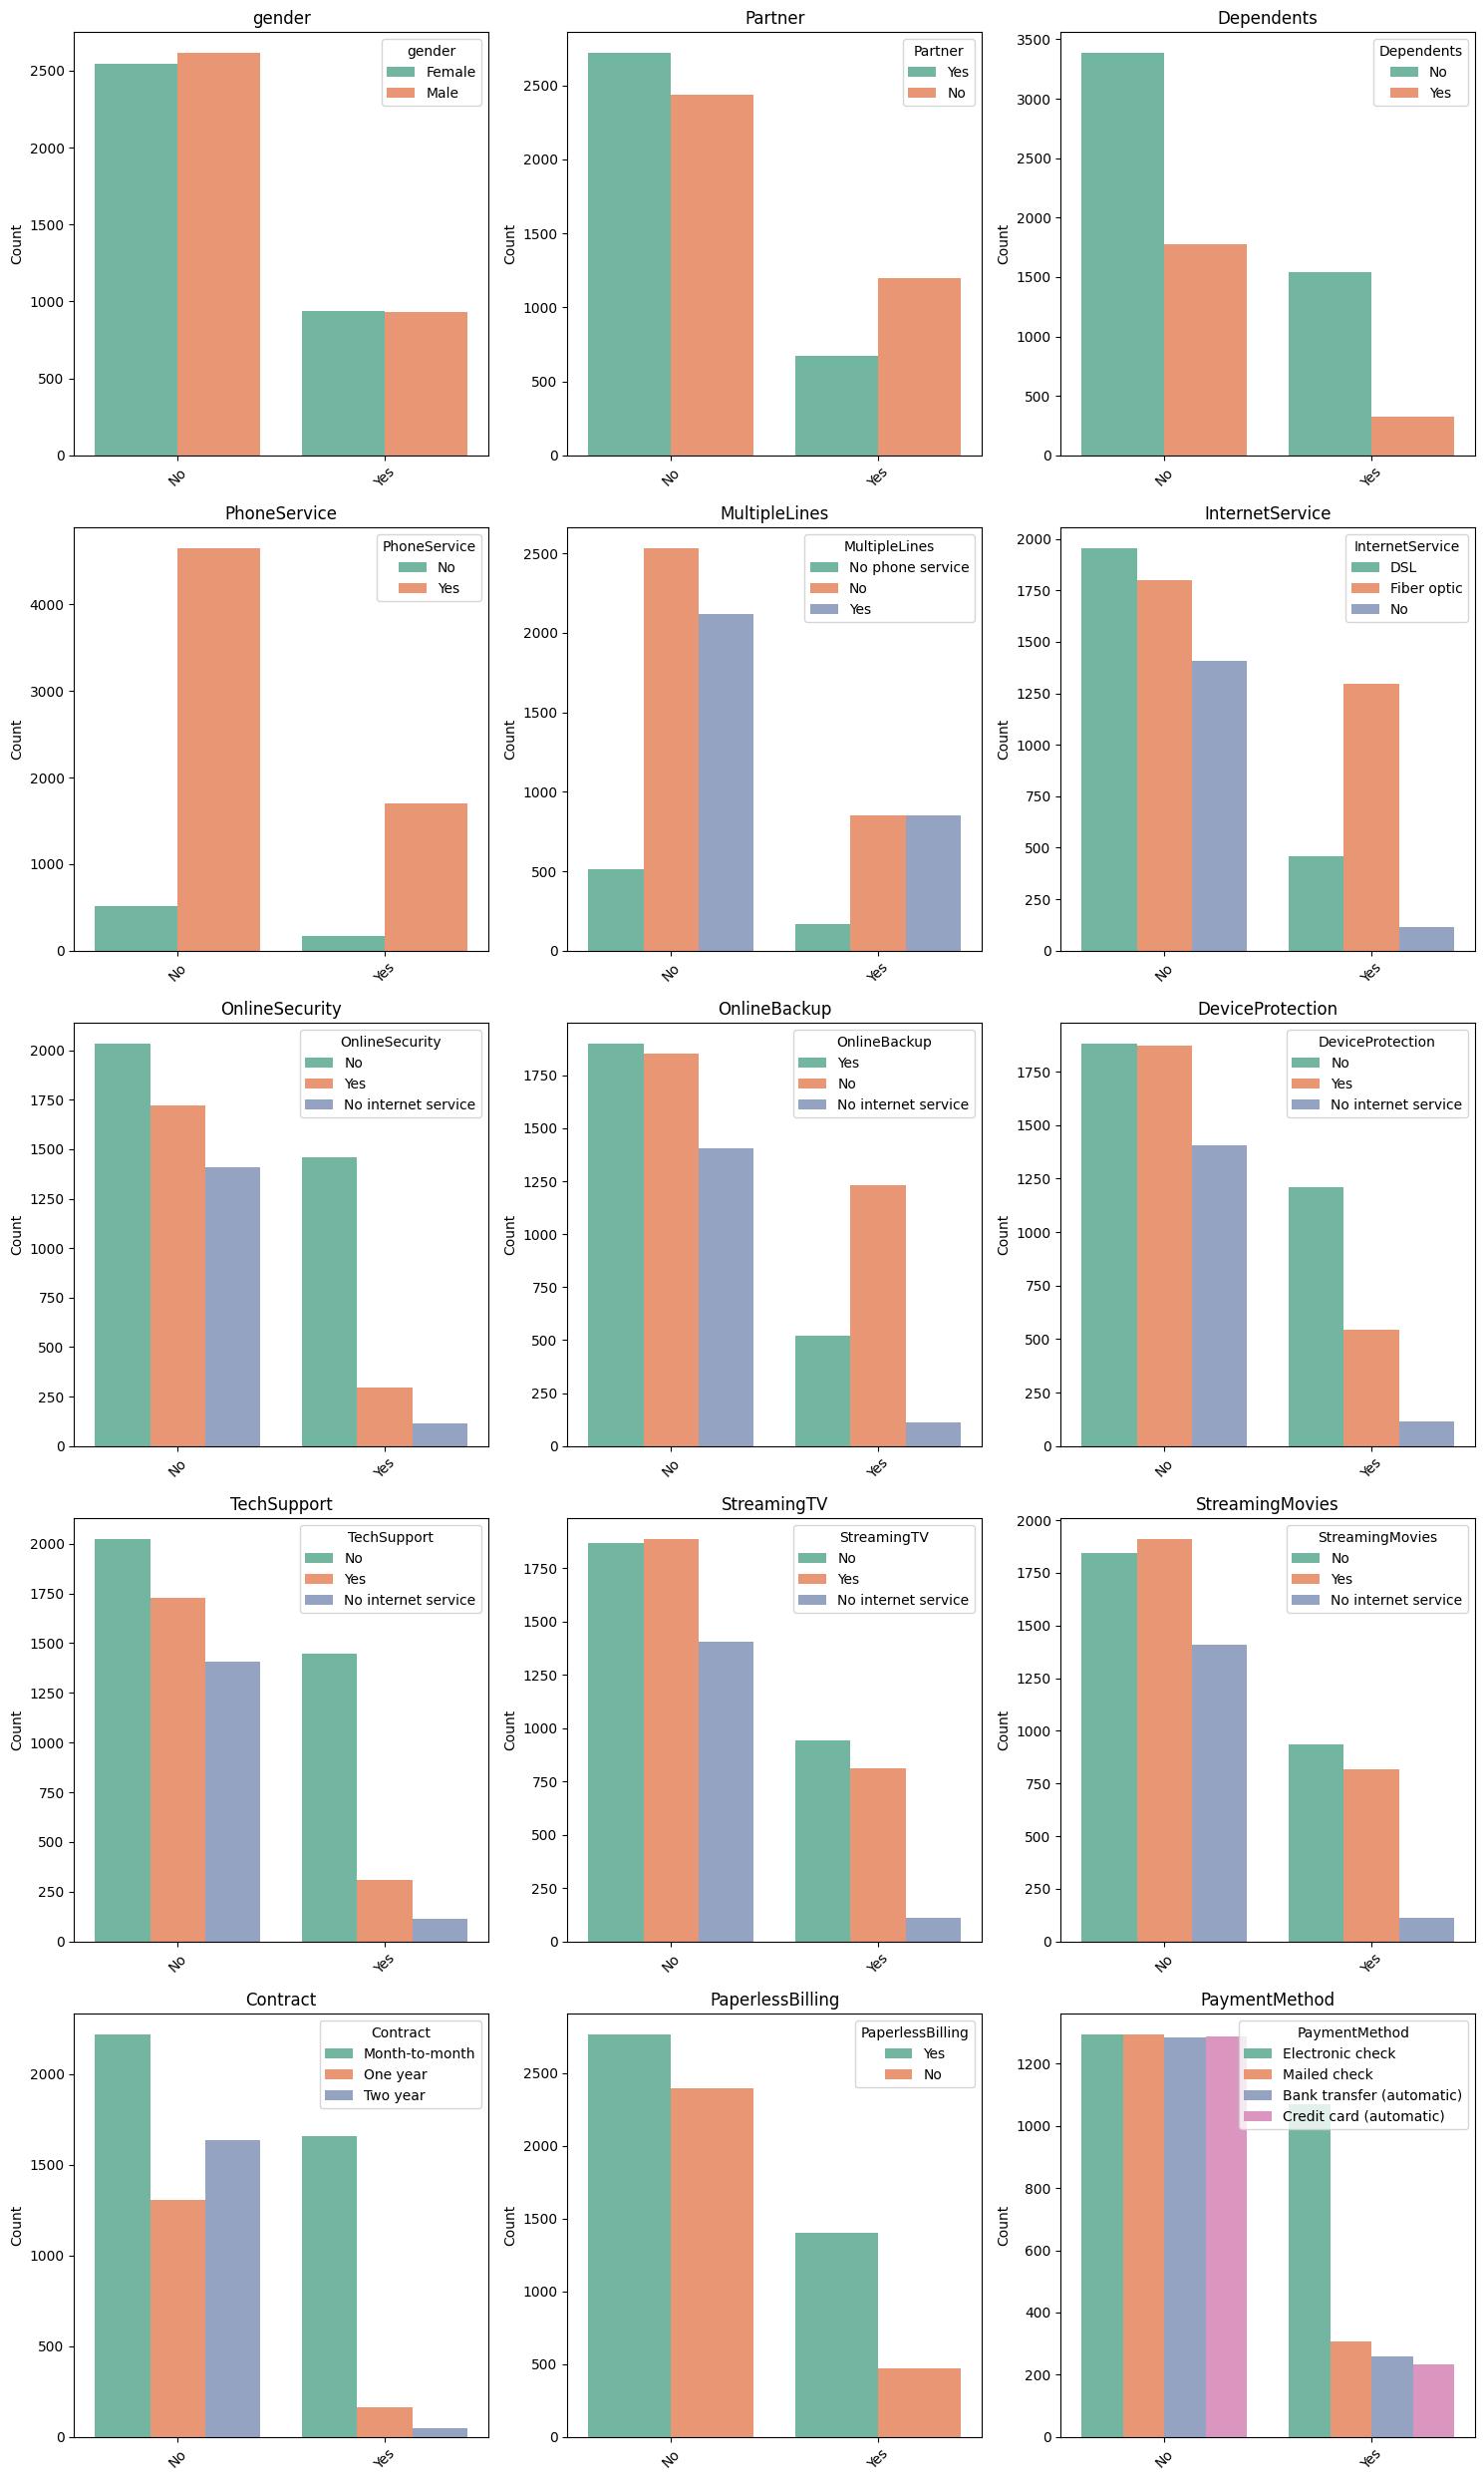

In [58]:
plot_categorical_churn(df)

Text(0.5, 1.0, 'Churn by Tenure')

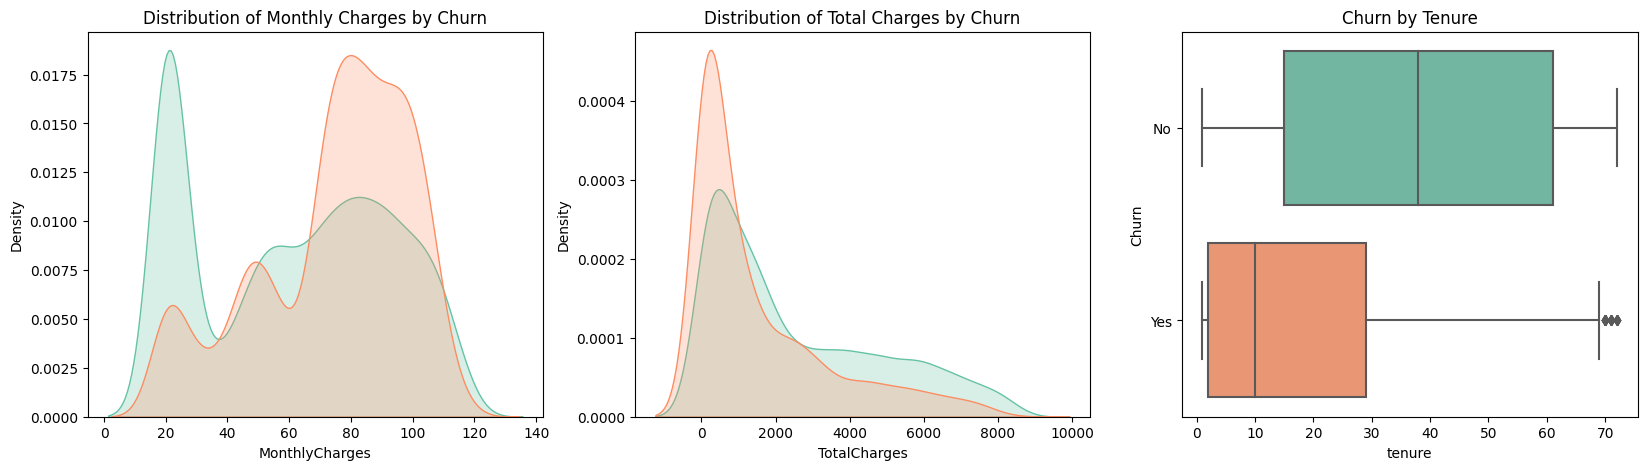

In [59]:
sns.set_palette('Set2')
fig = plt.figure(figsize=(20,5))
grid = fig.add_gridspec(1,3)

ax1 = fig.add_subplot(grid[0,0])
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], fill=True, ax=ax1)
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], fill=True, ax=ax1)
ax1.set_title('Distribution of Monthly Charges by Churn')

ax2 = fig.add_subplot(grid[0,1])
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], fill=True, ax=ax2)
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], fill=True, ax=ax2)
ax2.set_title('Distribution of Total Charges by Churn')

ax1 = fig.add_subplot(grid[0,2])
sns.boxplot(x=df['tenure'],y=df['Churn'])
ax1.set_title('Churn by Tenure')

Lets perform Machine learning to understand the data further more and create a predictive model to predict whether a new customer will churn or not. To start with we need to convert the categorical values into numerical values, we will use dummies from pandas module 

In [100]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [61]:
X = df.drop(['Churn_Yes'], axis=1)
Y = df['Churn_Yes']

In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
X = pd.DataFrame(minmax_df, columns=X.columns)
X.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


To split the dataset into training set and test set we will use train_test_split from sklearn

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,random_state=42)

In [66]:
Also taking the last row as validation to test the precdiction

In [67]:
X_val = X_test.iloc[-1]
Y_val = Y_test.iloc[-1]
X_test.drop(index=X_test.index[-1])
Y_test.drop(index=Y_test.index[-1])

customerID
6614-YWYSC    0
9546-KDTRB    0
0871-URUWO    1
5151-HQRDG    0
6624-JDRDS    0
             ..
8430-TWCBX    0
2250-IVBWA    0
5245-VDBUR    0
6961-MJKBO    0
6921-OZMFH    0
Name: Churn_Yes, Length: 2109, dtype: uint8

In [68]:
We will use 4 models to create the prediction model compare their accuracy, precision and recall to find out which is the better model
•	Logistic Regression
•	SVC (Support Vector Classifier)
•	KNN (k-Nearest Neighbors)
•	RFC (Random Forest Classifier)

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
accuracy = lr.score(X_test, Y_test)
print('Log Regression Accuracy:',(accuracy*100).round(2),'%')

Log Regression Accuracy: 79.57 %


To improve and fine tune our model we can use GridSearchCV and we are going to use GridSearchCV to improve all of our models

In [71]:
from sklearn.model_selection import GridSearchCV

lr_params = {'C':[0.01,0.1,1],
            'penalty':['l1','l2','elasticnet'],
            'solver':['liblinear','lbfgs','newton-cg', 'sag', 'saga']}

lr_cv = GridSearchCV(lr, lr_params, cv = 5)
lr_cv.fit(X_train, Y_train)
print("Best Parameters :",lr_cv.best_params_)
print("GridSearch Score :",(lr_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearch Score : 80.33 %


Lets find the Accuracy, precision and recall

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
y_predict_lr=lr_cv.best_estimator_.predict(X_test)
lr_accuracy = (accuracy_score(Y_test, y_predict_lr)*100).round(2)
lr_precision = (precision_score(Y_test, y_predict_lr)*100).round(2)
lr_recall = (recall_score(Y_test, y_predict_lr)*100).round(2)
print("Best param Logistic Regression Model Accuracy:",lr_accuracy,'%')
print("Best param Logistic Regression Model Precision:",lr_precision,'%')
print("Best param Logistic Regression Model Recall:",lr_recall.round(2),'%')

Best param Logistic Regression Model Accuracy: 79.91 %
Best param Logistic Regression Model Precision: 65.26 %
Best param Logistic Regression Model Recall: 52.23 %


Lets create a confusion matrix for the predictions of the test set

In [73]:
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Churn','No Churn']);

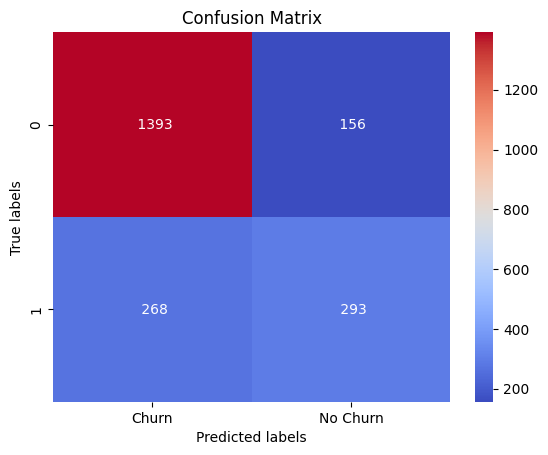

In [74]:
plot_confusion_matrix(Y_test,y_predict_lr)

SVC (Support Vector Classifier)

In [29]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
accuracy = svm.score(X_test, Y_test)
print('Support Vector Accuracy:',(accuracy*100).round(2),'%')

Support Vector Accuracy: 79.15 %


In [30]:
svm_params = {'C':[0.01,0.1,1],
'kernel':['linear', 'rbf','poly','sigmoid'],
'degree':[2,3,4,5],
'decision_function_shape':['ovo', 'ovr'],
'gamma':[0.01,0.1,1.0]}
svm_cv = GridSearchCV(svm,svm_params,cv=5)
svm_cv.fit(X_train, Y_train)
print("Best Parameters :",svm_cv.best_params_)
print("GridSearch Score:",(svm_cv.best_score_*100).round(2),'%')

Best Parameters : {'C': 1, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
GridSearch Score: 79.99 %


In [31]:
y_predict_svm=svm_cv.best_estimator_.predict(X_test)
svm_accuracy = (accuracy_score(Y_test, y_predict_svm)*100).round(2)
svm_precision = (precision_score(Y_test, y_predict_svm)*100).round(2)
svm_recall = (recall_score(Y_test, y_predict_svm)*100).round(2)
print("Best param SVM Model Accuracy:", svm_accuracy,'%')
print("Best param SVM Model Precision:", svm_precision,'%')
print("Best param SVM Model Recall:", svm_recall,'%')

Best param SVM Model Accuracy: 78.91 %
Best param SVM Model Precision: 63.24 %
Best param SVM Model Recall: 49.38 %


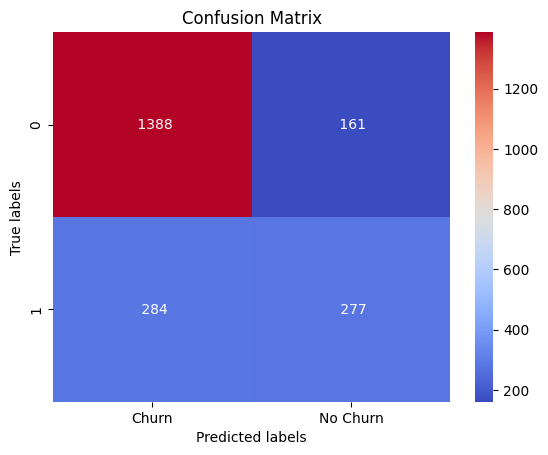

In [32]:
plot_confusion_matrix(Y_test,y_predict_svm)

KNN (k-Nearest Neighbors)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,Y_train)
accuracy = KNN.score(X_test, Y_test)
print('KNN Model Accuracy:',(accuracy*100).round(2),'%')


KNN Model Accuracy: 75.97 %


In [77]:
knn_params = {'n_neighbors': list(range(1,50)),
                'weights':['uniform','distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'p': [1,2]}

knn_cv = GridSearchCV(KNN,knn_params,cv=10)
knn_cv.fit(X_train, Y_train)
print("Best Parameters :",knn_cv.best_params_)
print("Best param KNN Score :",(knn_cv.best_score_*100).round(2),'%')

Best Parameters : {'algorithm': 'auto', 'n_neighbors': 42, 'p': 1, 'weights': 'uniform'}
Best param KNN Score : 79.36 %


In [78]:
y_predict_knn=knn_cv.best_estimator_.predict(X_test)
knn_accuracy = (accuracy_score(Y_test, y_predict_knn)*100).round(2)
knn_precision = (precision_score(Y_test, y_predict_knn)*100).round(2)
knn_recall = (precision_score(Y_test, y_predict_knn)*100).round(2)
print("Best K-Neighbors prediction accuracy:", knn_accuracy,'%')
print("Best K-Neighbors Precision accuracy:", knn_precision,'%')
print("Best K-Neighbors Recall accuracy:", knn_recall,'%')

Best K-Neighbors prediction accuracy: 78.86 %
Best K-Neighbors Precision accuracy: 60.95 %
Best K-Neighbors Recall accuracy: 60.95 %


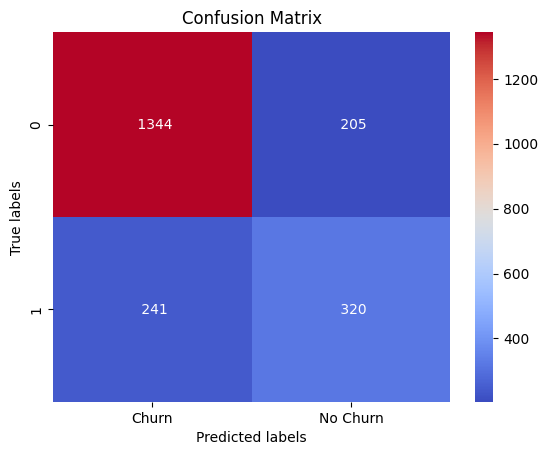

In [79]:
plot_confusion_matrix(Y_test,y_predict_knn)

In [38]:
RFC (Random Forest Classifier)

In [39]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# end = time.time()
r2 = rfc.score(X_test,Y_test)
print('Random Forest Classifier Accuracy =',(r2*100).round(2),'%')

Random Forest Classifier Accuracy = 78.06 %


In [40]:
rfc_params = {'n_estimators':[1,10,50,100,150,200,250,300],
                'criterion':['gini', 'entropy', 'log_loss'],
                'max_features':['sqrt', 'log2', None],
                'n_jobs':[-1, 1, None],
                'random_state':[2,4,6,8,10]}
rfc_cv = GridSearchCV(rfc,rfc_params,cv=5,scoring='r2')
rfc_cv.fit(X_train, Y_train)
print("Best Parameters :",rfc_cv.best_params_)

Best Parameters : {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50, 'n_jobs': -1, 'random_state': 8}


In [41]:
y_predict_rfc=rfc_cv.best_estimator_.predict(X_test)
rfc_accuracy = (accuracy_score(Y_test, y_predict_rfc)*100).round(2)
rfc_precision = (precision_score(Y_test, y_predict_rfc)*100).round(2)
rfc_recall = (recall_score(Y_test, y_predict_rfc)*100).round(2)
print("Best param Random Forest Classifier prediction Accuracy:", rfc_accuracy,'%')
print("Best param Random Forest Classifier Precision:", rfc_precision.round(2),'%')
print("Best param Random Forest Classifier Recall:", rfc_recall.round(2),'%')

Best param Random Forest Classifier prediction Accuracy: 78.82 %
Best param Random Forest Classifier Precision: 63.57 %
Best param Random Forest Classifier Recall: 47.59 %


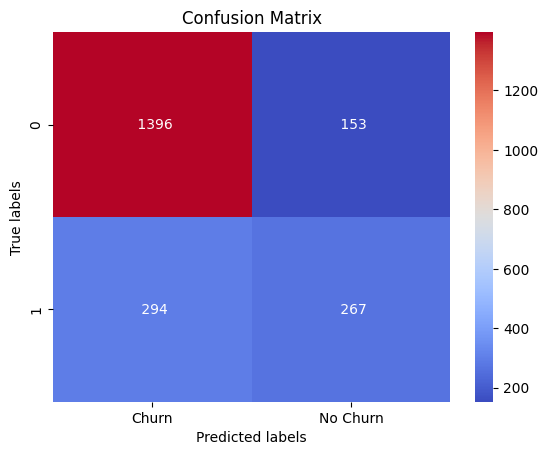

In [42]:
plot_confusion_matrix(Y_test,y_predict_rfc)

Lets compare the models to find the best model to predict the Churn

In [46]:
cols = {'Logistic Regression': [lr_accuracy, lr_precision, lr_recall],
        'SVM': [svm_accuracy, svm_precision, svm_recall],
        "KNN": [knn_accuracy, knn_precision, knn_recall],
        'RFC': [rfc_accuracy, rfc_precision, rfc_recall]}

table = pd.DataFrame.from_dict(cols, orient='index', columns=['Accuracy', 'Precision', 'Recall'])
table


,Accuracy,Precision,Recall
Logistic Regression,79.34,63.80,51.52
SVM,78.91,63.24,49.38
KNN,78.86,60.95,60.95
RFC,78.82,63.57,47.59


In [80]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(knn_cv, X_test, Y_test)

In [81]:
perm_table = pd.DataFrame(importance.importances_mean,index = X.columns, columns=['importance'])
perm_table.sort_values(by='importance', ascending=False, inplace=True)

perm_table.head()

,importance
tenure,0.016588
InternetService_Fiber optic,0.014313
PaymentMethod_Electronic check,0.009479
TotalCharges,0.008720
Partner_Yes,0.006919


In [98]:
def pred(data):
    if data == 1:
        print("Churned")
    else:
        print("Not Churned")

In [99]:
pred(knn_cv.best_estimator_.predict([X_val]))

Not Churned


In [104]:
pred(Y_val)

Not Churned
